# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from ctgan import CTGAN

# Set Variables

In [2]:
CULL_FRACTION = 1 #amount of dataset to use
TRAIN_FRACTION = 0.50 #train fraction
EPOCHS = 1000 
SAMPLES = 1000 #no of samples to generate

# Generate Initial Data

In [3]:
building_types = ['Single house', 'Townhouse', 'Duplex', 'Apartment']

dfs=[]

# Generate distributuion for each variable
dfs.append(pd.DataFrame({
    'Building area': np.random.normal(loc=(150+200)/2, scale=-(150-200)/(12**0.5), size=2500).round(),
    'Building Height': np.random.uniform(low=1, high=3, size=2500).round() * 3,
    'Building type': building_types[0],
    'Air temperature': np.random.normal(loc=22.78, scale=7.2, size=2500),
    'Humidity': np.random.normal(loc=61.3, scale=10.2, size=2500),
    'Solar radiation': np.random.normal(loc=2166, scale=270.05, size=2500).round(),
    'Normalized annual energy consumption': np.random.normal(loc=(120+180)/2, scale=(180-120)/(12**0.5), size=2500).round()
}))

dfs.append(pd.DataFrame({
    'Building area': np.random.normal(loc=(250+350)/2, scale=-(250-350)/(12**0.5), size=2500).round(),
    'Building Height': np.random.uniform(low=1, high=3, size=2500).round() * 3,
    'Building type': building_types[1],
    'Air temperature': np.random.normal(loc=22.78, scale=7.2, size=2500),
    'Humidity': np.random.normal(loc=61.3, scale=10.2, size=2500),
    'Solar radiation': np.random.normal(loc=2166, scale=270.05, size=2500).round(),
    'Normalized annual energy consumption': np.random.normal(loc=(150+220)/2, scale=-(150-220)/(12**0.5), size=2500).round()
}))

dfs.append(pd.DataFrame({
    'Building area': np.random.normal(loc=(100+150)/2, scale=-(100-150)/(12**0.5), size=2500).round(),
    'Building Height': np.random.uniform(low=2, high=3, size=2500).round() * 3,
    'Building type': building_types[2],
    'Air temperature': np.random.normal(loc=22.78, scale=7.2, size=2500),
    'Humidity': np.random.normal(loc=61.3, scale=10.2, size=2500),
    'Solar radiation': np.random.normal(loc=2166, scale=270.05, size=2500).round(),
    'Normalized annual energy consumption': np.random.normal(loc=(90+140)/2, scale=-(90-140)/(12**0.5), size=2500).round()
}))

dfs.append(pd.DataFrame({
    'Building area': np.random.normal(loc=(500+700)/2, scale=-(500-700)/(12**0.5), size=2500).round(),
    'Building Height': np.random.uniform(low=2, high=3, size=2500).round() * 3,
    'Building type': building_types[3],
    'Air temperature': np.random.normal(loc=22.78, scale=7.2, size=2500),
    'Humidity': np.random.normal(loc=61.3, scale=10.2, size=2500),
    'Solar radiation': np.random.normal(loc=2166, scale=270.05, size=2500).round(),
    'Normalized annual energy consumption': np.random.normal(loc=(180+240)/2, scale=-(180-240)/(12**0.5), size=2500).round()
}))

df = pd.concat(dfs, axis=0)

df = df.sample(frac=1).reset_index(drop=True)

df

,Building area,Building Height,Building type,Air temperature,Humidity,Solar radiation,Normalized annual energy consumption
0,284.0,9.0,Townhouse,27.024884,51.424016,2386.0,178.0
1,184.0,9.0,Single house,11.861247,70.665023,1889.0,180.0
2,187.0,6.0,Single house,14.014439,61.815945,2154.0,140.0
3,300.0,6.0,Townhouse,20.412912,52.470015,2113.0,191.0
4,244.0,3.0,Townhouse,13.382775,62.140411,2525.0,174.0
...,...,...,...,...,...,...,...
9995,191.0,9.0,Single house,18.568716,53.047444,2179.0,126.0
9996,160.0,6.0,Single house,28.863923,70.338802,2249.0,144.0
9997,147.0,6.0,Duplex,19.749771,70.192874,2239.0,78.0
9998,152.0,9.0,Single house,22.781285,80.653988,2671.0,141.0


# Pre Processing

In [4]:
cull_df = df.sample(frac=CULL_FRACTION).reset_index(drop=True)

train_data, test_data = train_test_split(cull_df, train_size=TRAIN_FRACTION)

print(train_data.shape, test_data.shape)

(5000, 7) (5000, 7)


In [5]:
features = ['Building area','Building Height', 'Building type', 'Air temperature', 'Humidity', 'Solar radiation']

# GAN Training

In [ ]:
ctgan = CTGAN(verbose=True)
ctgan.fit(train_data, features, epochs = EPOCHS)

Gen. (0.00) | Discrim. (0.00):   0%|                                                          | 0/1000 [00:00<?, ?it/s]C:\Users\raaja\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ..\aten\src\ATen\cuda\CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Gen. (1.38) | Discrim. (0.01):  11%|█████▏                                        | 114/1000 [24:49<3:44:12, 15.18s/it]

In [9]:
samples = ctgan.sample(SAMPLES)
samples

,Building area,Building Height,Building type,Air temperature,Humidity,Solar radiation,Normalized annual energy consumption
0,190.0,6.0,Apartment,23.250078,44.580550,1851.0,211.951255
1,143.0,9.0,Duplex,17.643477,75.212657,1912.0,124.614040
2,122.0,6.0,Apartment,26.690411,65.638289,2072.0,214.135762
3,142.0,6.0,Duplex,19.718933,69.053986,1945.0,125.831425
4,145.0,6.0,Duplex,18.909043,40.306904,2289.0,202.776422
...,...,...,...,...,...,...,...
995,116.0,6.0,Duplex,16.234944,74.739800,2006.0,112.677045
996,161.0,6.0,Apartment,19.660505,60.900997,2001.0,231.320697
997,716.0,6.0,Townhouse,25.373349,60.617487,2564.0,223.071634
998,369.0,9.0,Townhouse,23.836961,63.537827,1725.0,145.520402


# Evaluation

In [12]:
eval_real = test_data
eval_fake = samples

le = LabelEncoder()
eval_real['Building type'] = le.fit_transform(test_data['Building type'])
eval_fake['Building type'] = le.fit_transform(samples['Building type'])

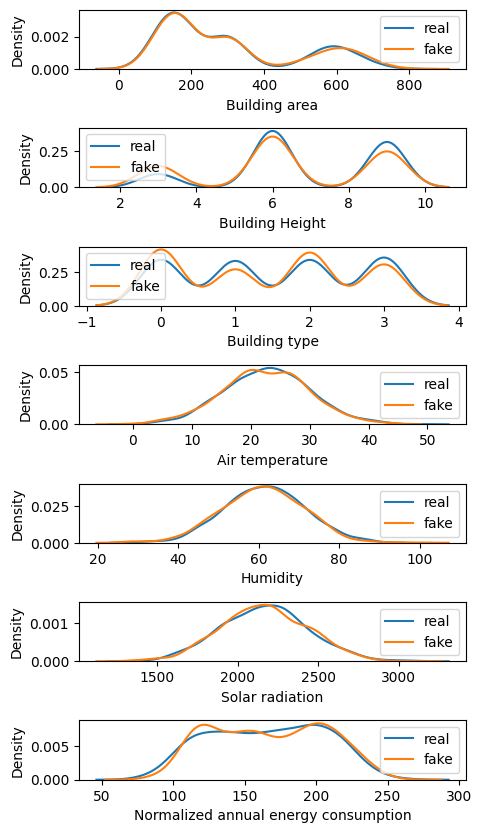

In [65]:
fig = plt.figure(figsize=(5,10))
fig.subplots_adjust(hspace=1, wspace=0.4)

for n,cat in enumerate(eval_real.columns):
    ax = fig.add_subplot(7, 1, n+1)
    sns.kdeplot(eval_real[cat], label = 'real', ax=ax)
    sns.kdeplot(eval_fake[cat], label = 'fake', ax = ax)
    plt.legend()

<Axes: >

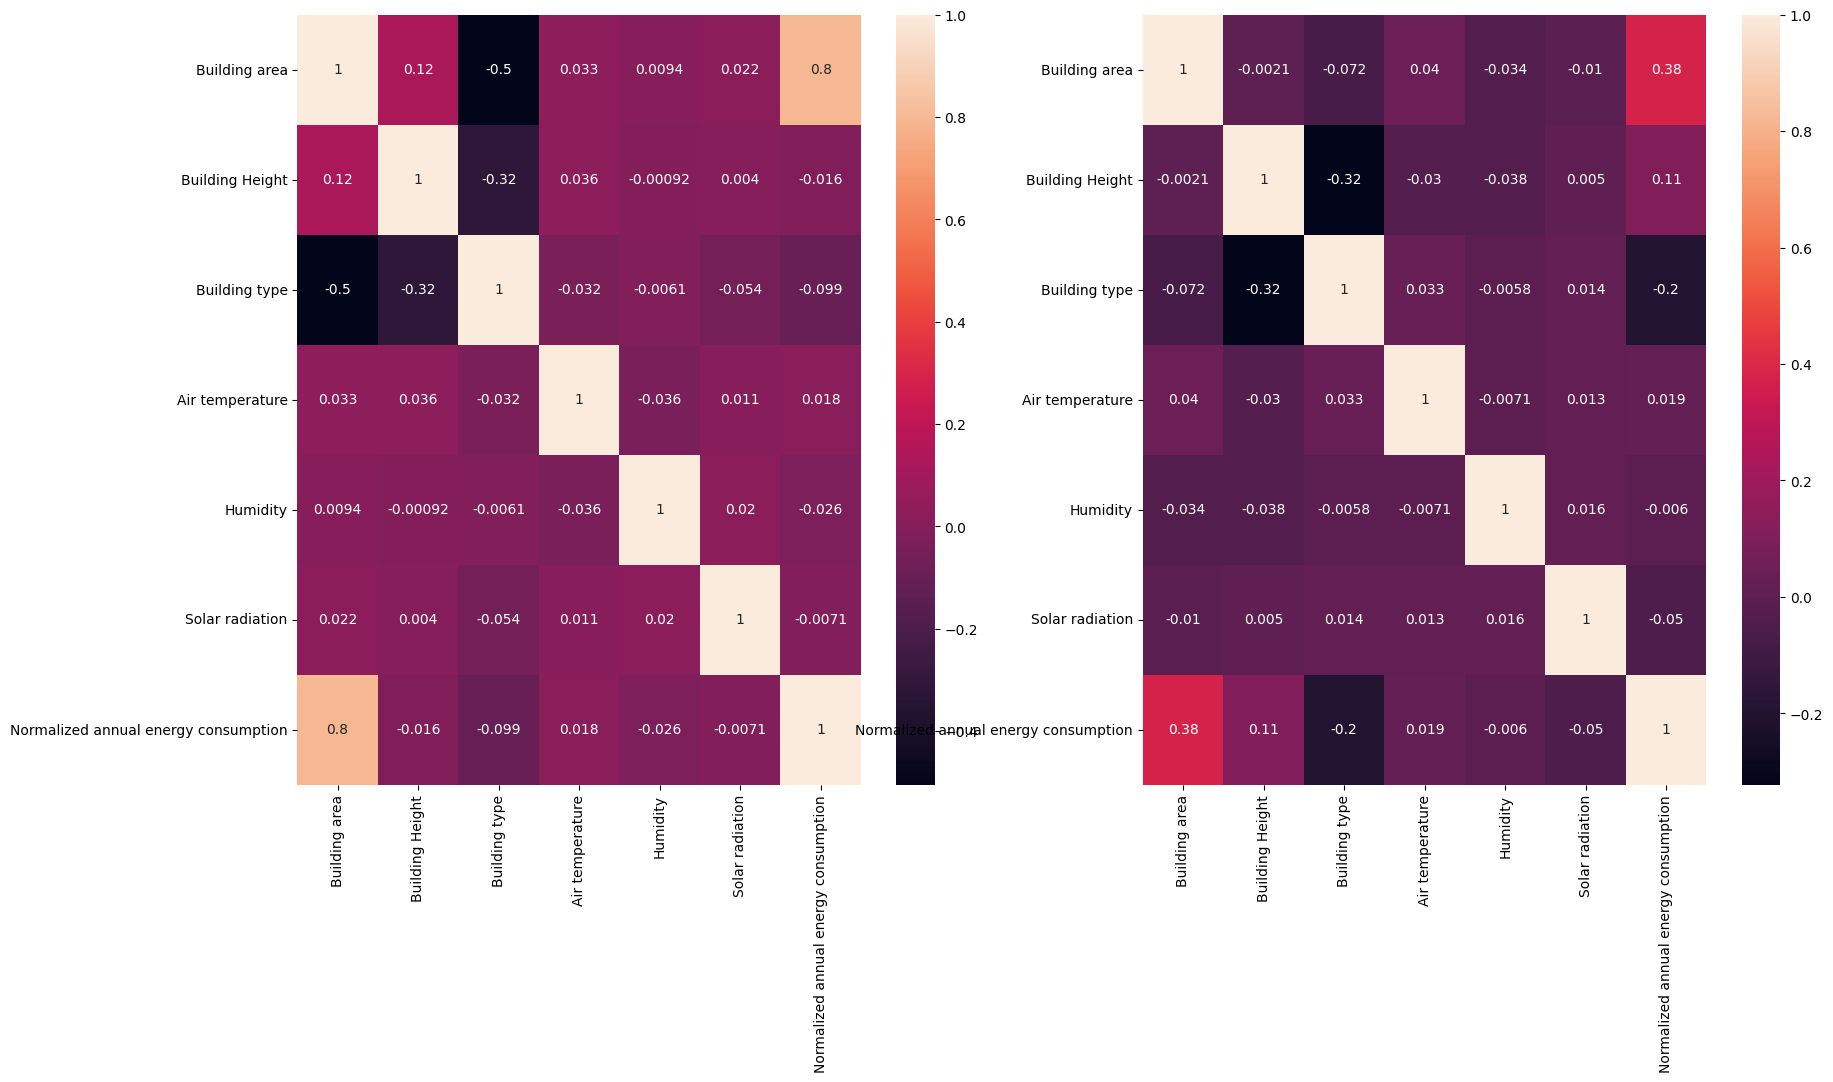

In [54]:
fig_corr = plt.figure(figsize=(20,10))
ax = fig_corr.add_subplot(1, 2, 1)
sns.heatmap(eval_real.corr(), annot=True, ax=ax)
ax = fig_corr.add_subplot(1, 2, 2)
sns.heatmap(eval_fake.corr(), annot=True, ax=ax)